In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pylab as plt

print(tf.__version__)

1.12.0


# 导入 Fashion MNIST 数据集

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 探索数据

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

# 预处理数据

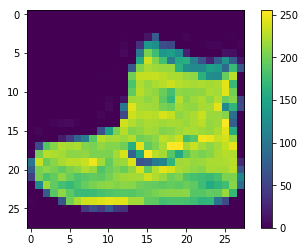

In [8]:
%matplotlib inline
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [9]:
train_images = train_images/255.0
test_images = test_images/255.0

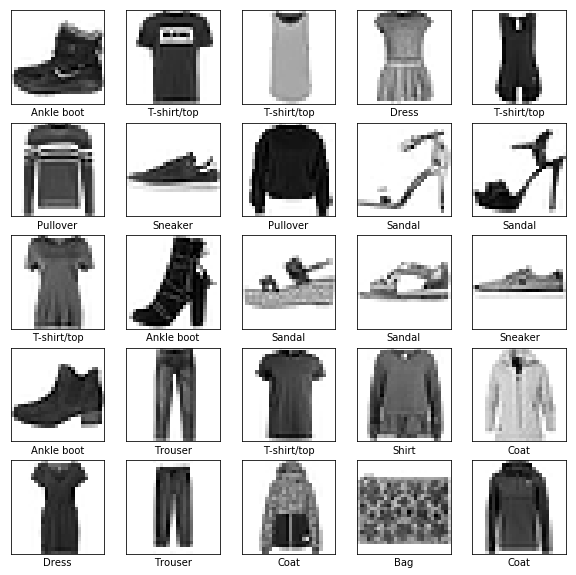

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# 构建模型

## 设置层

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

该网络中的第一层 tf.keras.layers.Flatten 将图像格式从二维数组（28x28 像素）转换成一维数组（28 * 28 = 784 像素）。可以将该层视为图像中像素未堆叠的行，并排列这些行。该层没有要学习的参数；它只改动数据的格式。
在扁平化像素之后，该网络包含两个 tf.keras.layers.Dense 层的序列。这些层是密集连接或全连接神经层。第一个 Dense 层具有 128 个节点（或神经元）。第二个（也是最后一个）层是具有 10 个节点的 softmax 层，该层会返回一个具有 10 个概率得分的数组，这些得分的总和为 1。每个节点包含一个得分，表示当前图像属于 10 个类别中某一个的概率。

## 编译模型

模型还需要再进行几项设置才可以开始训练。这些设置会添加到模型的编译步骤：

- 损失函数 - 衡量模型在训练期间的准确率。我们希望尽可能缩小该函数，以“引导”模型朝着正确的方向优化。
- 优化器 - 根据模型看到的数据及其损失函数更新模型的方式。
- 指标 - 用于监控训练和测试步骤。以下示例使用准确率，即图像被正确分类的比例。

In [17]:
model.compile(
            optimizer=tf.train.AdamOptimizer(),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# 训练模型

训练神经网络模型需要执行以下步骤：

- 将训练数据馈送到模型中，在本示例中为 train_images 和 train_labels 数组。
- 模型学习将图像与标签相关联。
- 我们要求模型对测试集进行预测，在本示例中为 test_images 数组。我们会验证预测结果是否与 test_labels 数组中的标签一致。

In [18]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.5009 - acc: 0.8231
Epoch 2/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.3762 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.3353 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.3110 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.2941 - acc: 0.8910


# 评估准确率

In [19]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('Test Acc:' , test_acc)

10000/10000 [==============================] - 0s 31us/step
Test Acc: 0.8667


# 做出预测

In [24]:
predictions = model.predict(test_images)
predictions[0]

array([1.01784544e-05, 2.94352873e-07, 1.16384244e-05, 2.63497128e-07,
       1.38556732e-06, 2.49182922e-04, 1.29003765e-05, 2.46601626e-02,
       1.49201747e-04, 9.74904776e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

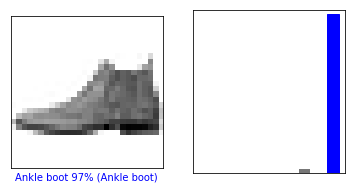

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

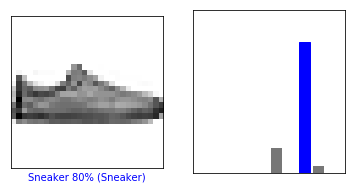

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

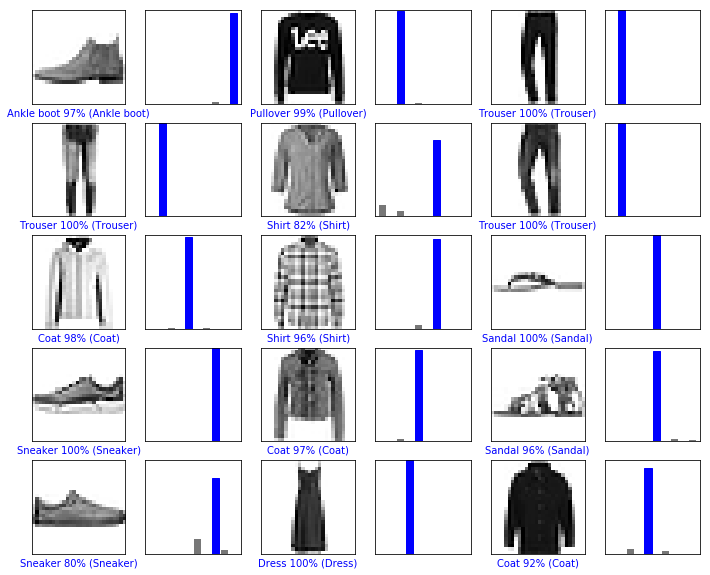

In [28]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [29]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.0178434e-05 2.9435316e-07 1.1638424e-05 2.6349761e-07 1.3855699e-06
  2.4918315e-04 1.2900364e-05 2.4660174e-02 1.4920173e-04 9.7490478e-01]]


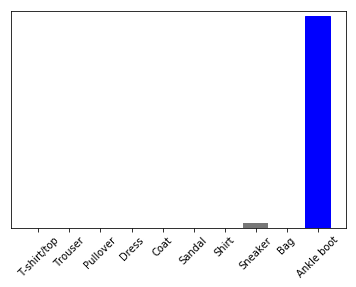

In [32]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [33]:
np.argmax(predictions_single[0])

9